In [1]:
# Install required libraries
!pip install opencv-python-headless matplotlib numpy


Please upload an image file:


Saving Image.jpg to Image.jpg
Uploaded image: Image.jpg
Image dimensions: 1080x1920
Image data type: uint8


/tmp/ipython-input-2821791468.py:39: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(original_image.ravel(), 256, [0, 256])


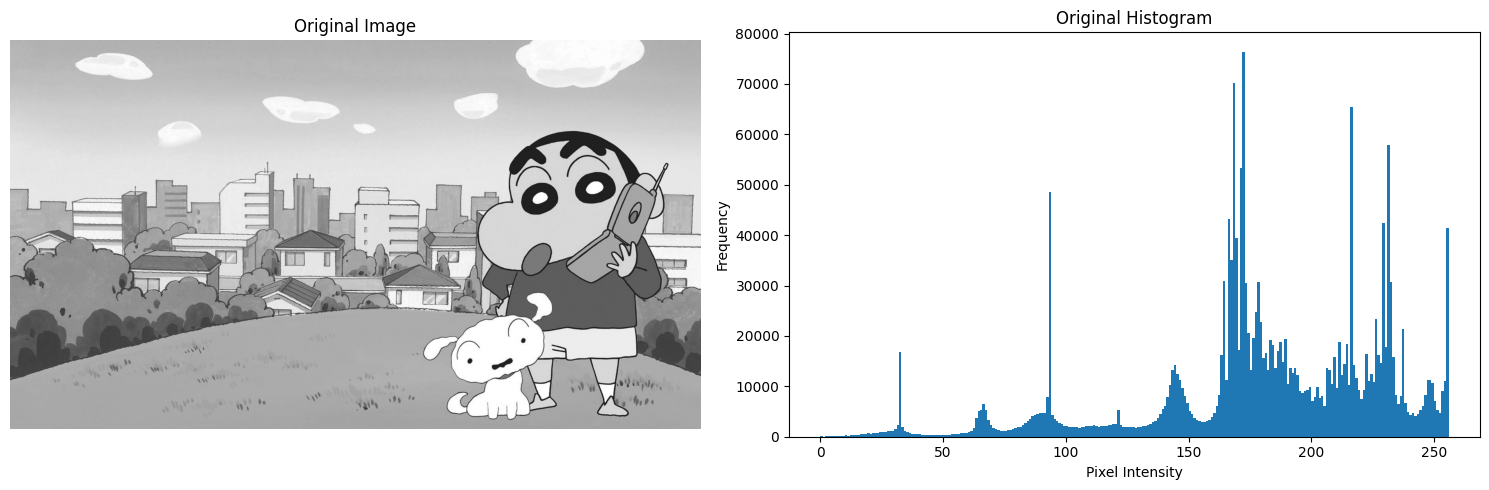

/tmp/ipython-input-2821791468.py:54: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(original_image.flatten(), 256, [0, 256], color='r', alpha=0.5, label='Histogram')


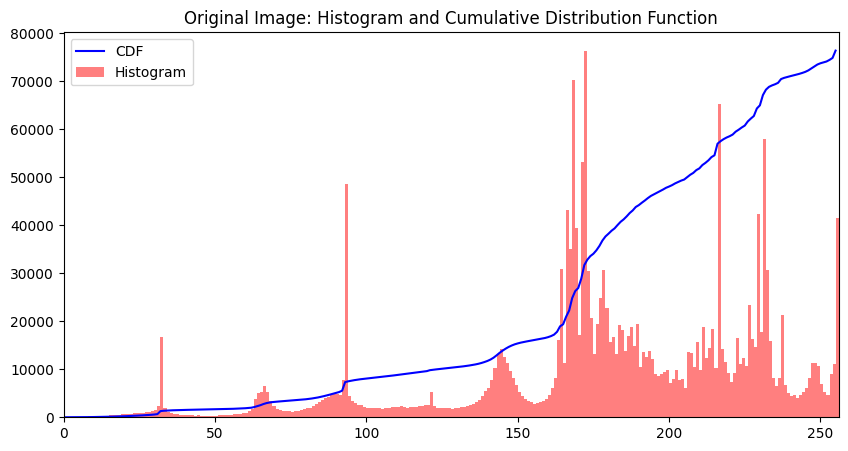

In [2]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Set up matplotlib for inline display
%matplotlib inline

# Upload an image file
print("Please upload an image file:")
uploaded = files.upload()
image_filename = list(uploaded.keys())[0]
print(f"Uploaded image: {image_filename}")

# Read the image in grayscale
original_image = cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE)

# Check if image was loaded successfully
if original_image is None:
    raise ValueError("Image not loaded. Please check the file path.")

# Get image dimensions
height, width = original_image.shape
print(f"Image dimensions: {height}x{width}")
print(f"Image data type: {original_image.dtype}")

# Display original image and its histogram
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Original histogram
plt.subplot(1, 2, 2)
plt.hist(original_image.ravel(), 256, [0, 256])
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate and display cumulative distribution function (CDF) for original image
hist, bins = np.histogram(original_image.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.figure(figsize=(10, 5))
plt.plot(cdf_normalized, color='b', label='CDF')
plt.hist(original_image.flatten(), 256, [0, 256], color='r', alpha=0.5, label='Histogram')
plt.xlim([0, 256])
plt.legend(loc='upper left')
plt.title('Original Image: Histogram and Cumulative Distribution Function')
plt.show()

/tmp/ipython-input-2653750801.py:15: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized_image.ravel(), 256, [0, 256])


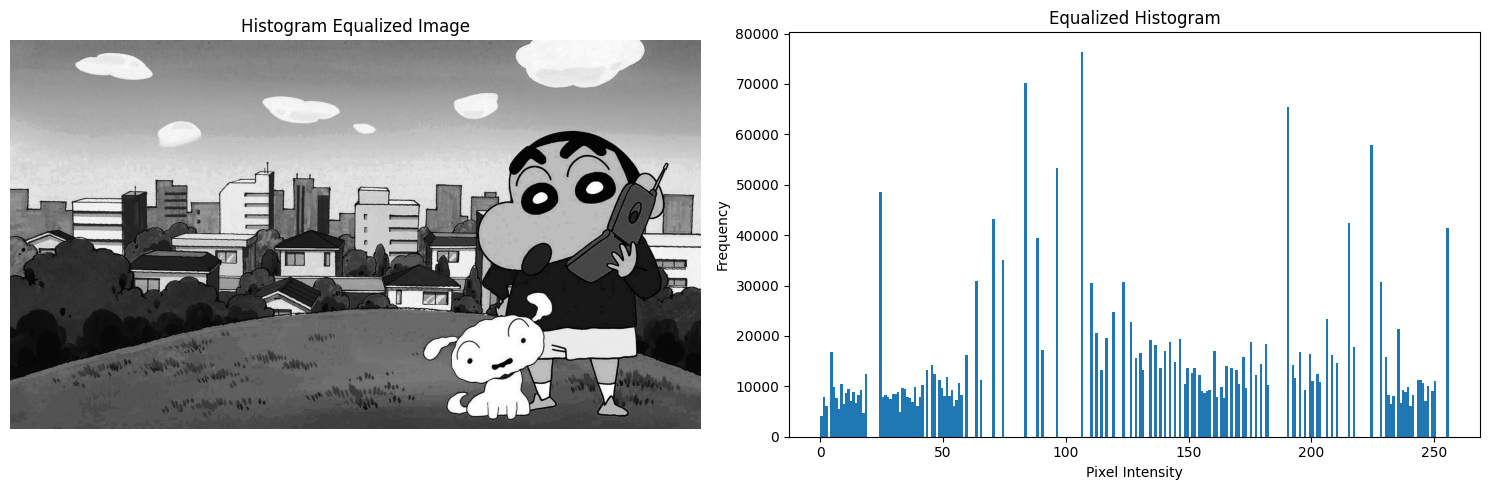

In [3]:
# Perform global histogram equalization :cite[1]:cite[5]:cite[6]
equalized_image = cv2.equalizeHist(original_image)

# Display equalized image and its histogram
plt.figure(figsize=(15, 5))

# Equalized image
plt.subplot(1, 2, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

# Equalized histogram
plt.subplot(1, 2, 2)
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


/tmp/ipython-input-3288025690.py:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized_image.flatten(), 256, [0, 256], color='r', alpha=0.5, label='Histogram')


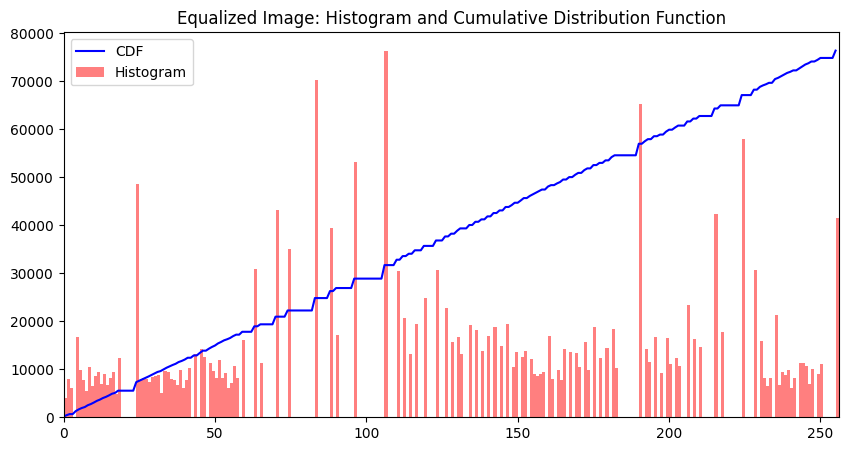

/tmp/ipython-input-3288025690.py:29: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(clahe_image.ravel(), 256, [0, 256])


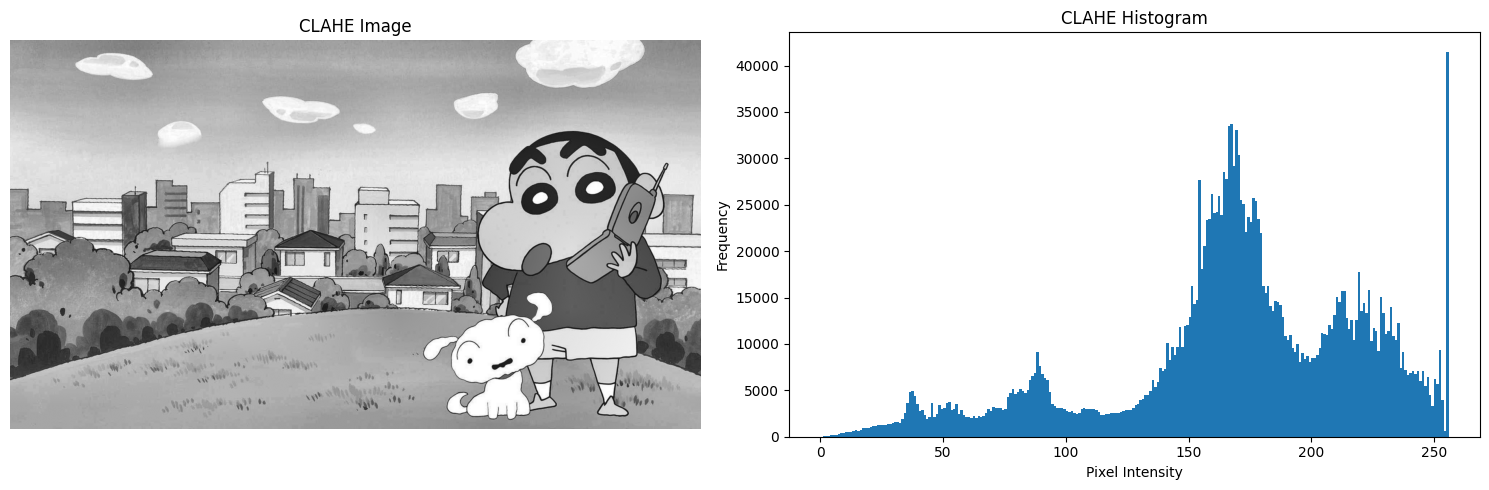

In [4]:
# Calculate and display CDF for equalized image
hist_eq, bins_eq = np.histogram(equalized_image.flatten(), 256, [0, 256])
cdf_eq = hist_eq.cumsum()
cdf_normalized_eq = cdf_eq * float(hist_eq.max()) / cdf_eq.max()

plt.figure(figsize=(10, 5))
plt.plot(cdf_normalized_eq, color='b', label='CDF')
plt.hist(equalized_image.flatten(), 256, [0, 256], color='r', alpha=0.5, label='Histogram')
plt.xlim([0, 256])
plt.legend(loc='upper left')
plt.title('Equalized Image: Histogram and Cumulative Distribution Function')
plt.show()

# Perform Contrast Limited Adaptive Histogram Equalization (CLAHE) :cite[1]:cite[6]:cite[8]
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(original_image)

# Display CLAHE image and its histogram
plt.figure(figsize=(15, 5))

# CLAHE image
plt.subplot(1, 2, 1)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Image')
plt.axis('off')

# CLAHE histogram
plt.subplot(1, 2, 2)
plt.hist(clahe_image.ravel(), 256, [0, 256])
plt.title('CLAHE Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

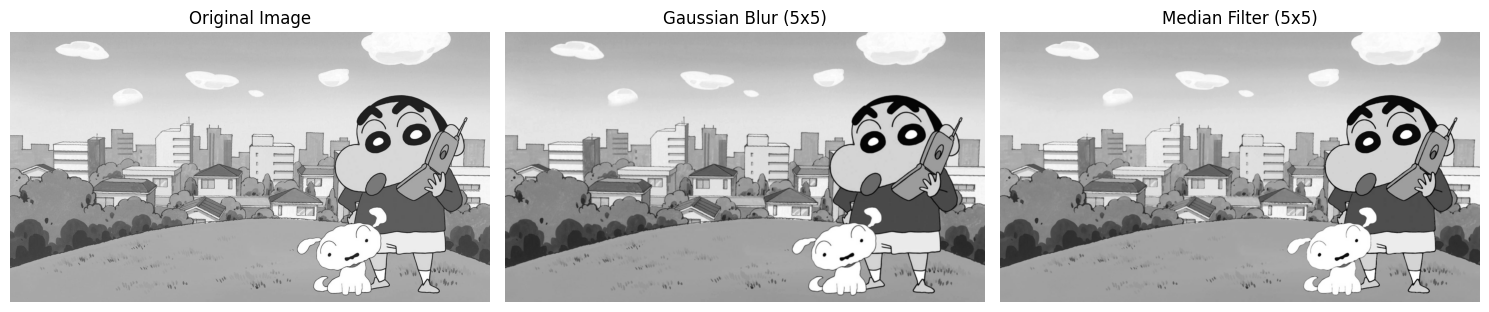

In [5]:
# Apply spatial domain filters :cite[4]

# Gaussian blur
gaussian_blur = cv2.GaussianBlur(original_image, (5, 5), 0)

# Median filter
median_blur = cv2.medianBlur(original_image, 5)

# Display spatial domain filtering results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blur (5x5)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(median_blur, cmap='gray')
plt.title('Median Filter (5x5)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# Apply frequency domain filters :cite[2]:cite[7]

# Perform Fourier Transform
dft = np.fft.fft2(original_image)
dft_shift = np.fft.fftshift(dft)

# Create a low-pass filter (LPF) mask
rows, cols = original_image.shape
crow, ccol = rows // 2, cols // 2
mask_lpf = np.zeros((rows, cols), np.uint8)
mask_lpf[crow-30:crow+30, ccol-30:ccol+30] = 1

# Create a high-pass filter (HPF) mask
mask_hpf = np.ones((rows, cols), np.uint8)
mask_hpf[crow-30:crow+30, ccol-30:ccol+30] = 0

# Apply LPF and inverse FFT
fshift_lpf = dft_shift * mask_lpf
f_ishift_lpf = np.fft.ifftshift(fshift_lpf)
img_back_lpf = np.fft.ifft2(f_ishift_lpf)
img_back_lpf = np.abs(img_back_lpf)

# Apply HPF and inverse FFT
fshift_hpf = dft_shift * mask_hpf
f_ishift_hpf = np.fft.ifftshift(fshift_hpf)
img_back_hpf = np.fft.ifft2(f_ishift_hpf)
img_back_hpf = np.abs(img_back_hpf)

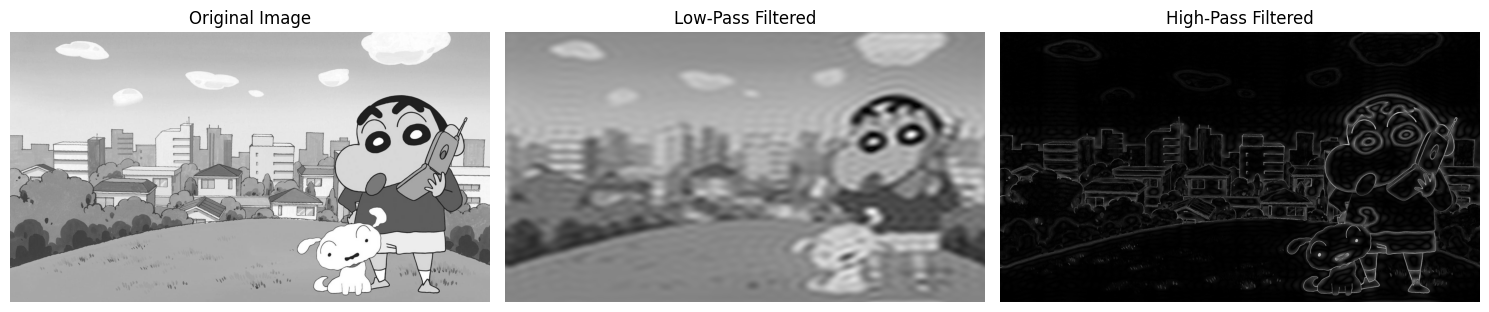

In [7]:
# Display frequency domain filtering results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_back_lpf, cmap='gray')
plt.title('Low-Pass Filtered')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_back_hpf, cmap='gray')
plt.title('High-Pass Filtered')
plt.axis('off')

plt.tight_layout()
plt.show()

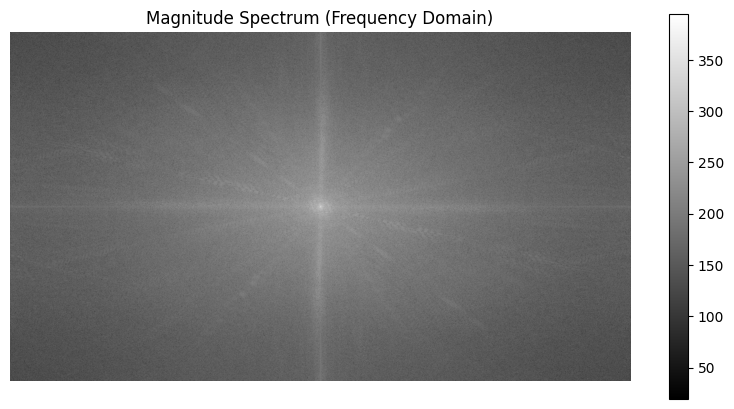

In [8]:
# Display magnitude spectrum of the Fourier Transform
magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)  # Add 1 to avoid log(0)

plt.figure(figsize=(10, 5))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (Frequency Domain)')
plt.axis('off')
plt.colorbar()
plt.show()

/tmp/ipython-input-888502295.py:10: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(original_image.ravel(), 256, [0, 256])
/tmp/ipython-input-888502295.py:21: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized_image.ravel(), 256, [0, 256])
/tmp/ipython-input-888502295.py:32: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(clahe_image.ravel(), 256, [0, 256])


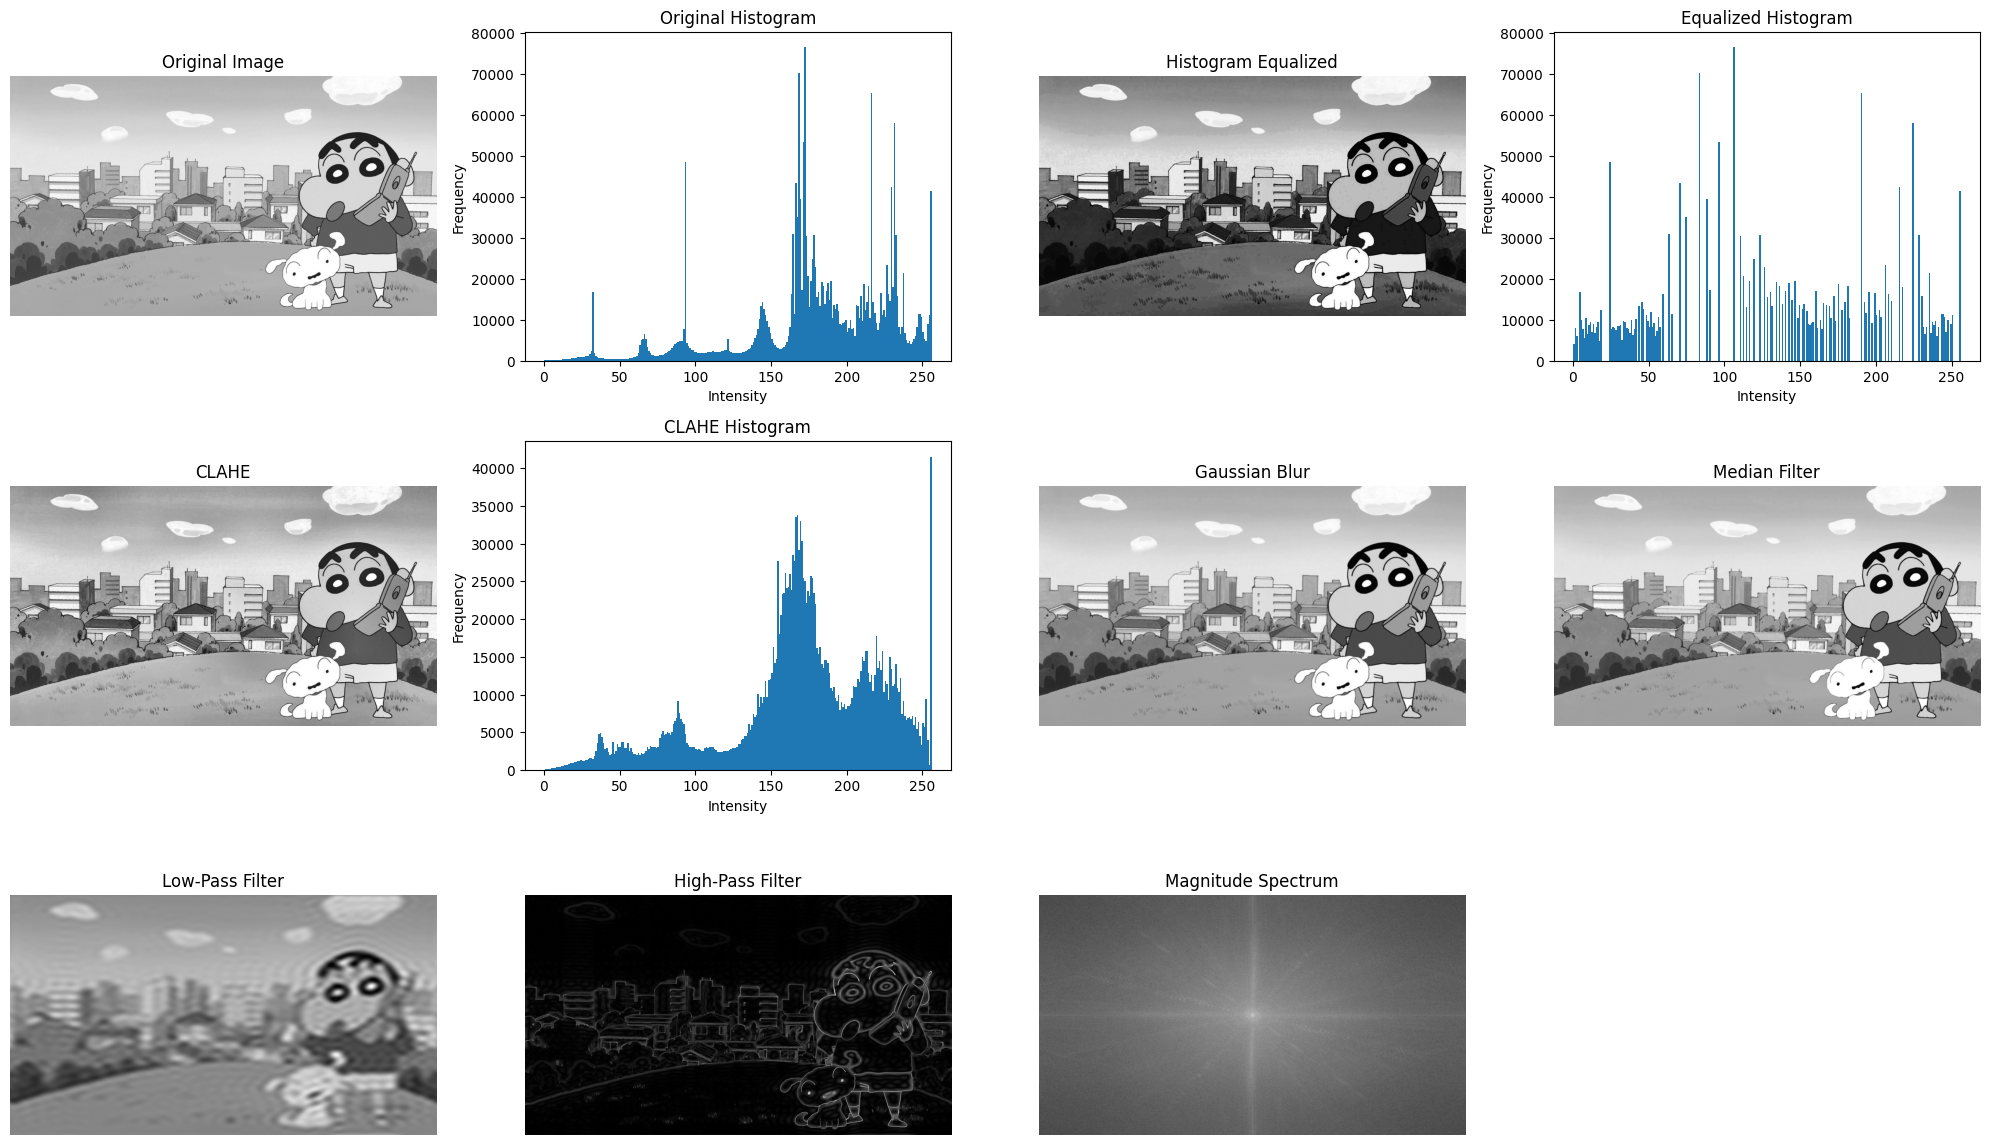


RESULTS ANALYSIS:

1. HISTOGRAM EQUALIZATION:
   - Global histogram equalization redistributes pixel intensities across the entire range [0,255]
   - This improves contrast but may over-enhance noise in some images :cite[1]:cite[5]
   - The equalized histogram should be more flat and spread out compared to the original

2. CLAHE (CONTRAST LIMITED ADAPTIVE HISTOGRAM EQUALIZATION):
   - Works on small regions of the image rather than the entire image :cite[1]:cite[8]
   - Limits contrast amplification to reduce noise amplification
   - Often produces more natural-looking results than global histogram equalization

3. SPATIAL DOMAIN FILTERS:
   - Gaussian blur reduces noise and detail through weighted averaging :cite[4]
   - Median filter is effective for removing salt-and-pepper noise while preserving edges

4. FREQUENCY DOMAIN FILTERS:
   - Low-pass filtering blurs the image by attenuating high frequencies :cite[2]:cite[7]
   - High-pass filtering enhances edges and details by attenuat

In [9]:
# Compare all results in a comprehensive figure
plt.figure(figsize=(20, 12))

plt.subplot(3, 4, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.hist(original_image.ravel(), 256, [0, 256])
plt.title('Original Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(3, 4, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized')
plt.axis('off')

plt.subplot(3, 4, 4)
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.title('Equalized Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(3, 4, 5)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE')
plt.axis('off')

plt.subplot(3, 4, 6)
plt.hist(clahe_image.ravel(), 256, [0, 256])
plt.title('CLAHE Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(3, 4, 7)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(3, 4, 8)
plt.imshow(median_blur, cmap='gray')
plt.title('Median Filter')
plt.axis('off')

plt.subplot(3, 4, 9)
plt.imshow(img_back_lpf, cmap='gray')
plt.title('Low-Pass Filter')
plt.axis('off')

plt.subplot(3, 4, 10)
plt.imshow(img_back_hpf, cmap='gray')
plt.title('High-Pass Filter')
plt.axis('off')

plt.subplot(3, 4, 11)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()

# Comments on the results
print("""
RESULTS ANALYSIS:

1. HISTOGRAM EQUALIZATION:
   - Global histogram equalization redistributes pixel intensities across the entire range [0,255]
   - This improves contrast but may over-enhance noise in some images :cite[1]:cite[5]
   - The equalized histogram should be more flat and spread out compared to the original

2. CLAHE (CONTRAST LIMITED ADAPTIVE HISTOGRAM EQUALIZATION):
   - Works on small regions of the image rather than the entire image :cite[1]:cite[8]
   - Limits contrast amplification to reduce noise amplification
   - Often produces more natural-looking results than global histogram equalization

3. SPATIAL DOMAIN FILTERS:
   - Gaussian blur reduces noise and detail through weighted averaging :cite[4]
   - Median filter is effective for removing salt-and-pepper noise while preserving edges

4. FREQUENCY DOMAIN FILTERS:
   - Low-pass filtering blurs the image by attenuating high frequencies :cite[2]:cite[7]
   - High-pass filtering enhances edges and details by attenuating low frequencies
   - The magnitude spectrum shows the distribution of frequency components in the image
""")